In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Lendo o dataset de treino e trabalhando nas colunas : 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [5]:
train['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    4506
1    2504
Name: count, dtype: int64

In [6]:
col = ['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Heart Attack Risk']

y = np.array(train['Heart Attack Risk'])
train = train.loc[:, ~train.columns.isin(col)]
train.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere
0,33,Male,200,48,0,1,1,1,1,7.807690,...,0,1,2,0.138443,184066,30.449815,63,6,7,Southern Hemisphere
1,56,Female,262,46,1,0,1,0,0,17.297628,...,1,0,8,0.369552,211755,34.973685,333,7,8,Northern Hemisphere
2,19,Female,140,54,0,1,0,0,1,8.695288,...,1,1,3,8.646334,252203,30.554246,537,2,10,Northern Hemisphere
3,50,Female,163,53,0,1,1,1,1,10.161587,...,0,1,7,1.107884,121954,35.390265,591,0,9,Southern Hemisphere
4,89,Female,144,92,1,0,1,0,1,16.436787,...,1,0,1,1.337570,180121,39.575483,145,2,5,Northern Hemisphere


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              7010 non-null   int64  
 1   Sex                              7010 non-null   object 
 2   Cholesterol                      7010 non-null   int64  
 3   Heart Rate                       7010 non-null   int64  
 4   Diabetes                         7010 non-null   int64  
 5   Family History                   7010 non-null   int64  
 6   Smoking                          7010 non-null   int64  
 7   Obesity                          7010 non-null   int64  
 8   Alcohol Consumption              7010 non-null   int64  
 9   Exercise Hours Per Week          7010 non-null   float64
 10  Diet                             7010 non-null   object 
 11  Previous Heart Problems          7010 non-null   int64  
 12  Medication Use      

In [8]:
train['Diet'].value_counts()

Diet
Healthy      2351
Average      2341
Unhealthy    2318
Name: count, dtype: int64

In [9]:
# Fazendo o OneHotEncoder da classe Embarked.

encoded_df = pd.get_dummies(train[['Diet']], columns=['Diet']).astype(int)

train.drop(columns = ['Diet'], inplace = True)
train = pd.concat([train, encoded_df], axis = 1)
train.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,33,Male,200,48,0,1,1,1,1,7.807690,...,0.138443,184066,30.449815,63,6,7,Southern Hemisphere,0,0,1
1,56,Female,262,46,1,0,1,0,0,17.297628,...,0.369552,211755,34.973685,333,7,8,Northern Hemisphere,1,0,0
2,19,Female,140,54,0,1,0,0,1,8.695288,...,8.646334,252203,30.554246,537,2,10,Northern Hemisphere,1,0,0
3,50,Female,163,53,0,1,1,1,1,10.161587,...,1.107884,121954,35.390265,591,0,9,Southern Hemisphere,0,1,0
4,89,Female,144,92,1,0,1,0,1,16.436787,...,1.337570,180121,39.575483,145,2,5,Northern Hemisphere,0,1,0


In [10]:
train.loc[:, 'Sex'] = train.loc[:, 'Sex'].replace({'Male' : 1, 'Female' : 0})
train.loc[:, 'Hemisphere'] = train.loc[:, 'Hemisphere'].replace({'Southern Hemisphere' : 1, 'Northern Hemisphere' : 0})

#### Padronizando os dados para alimentar o modelo : 

In [11]:
train = train.astype(float)

In [12]:
# Escalonando os dados com MinMaxScaler : 

#scaler = MinMaxScaler()
#x = scaler.fit_transform(train)

In [13]:
# Escalonando os dados com o StandardScaler : 

scaler = StandardScaler()
x = np.array(scaler.fit_transform(train))

In [14]:
train_norm = pd.DataFrame(x, columns = train.columns)

train_norm.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,-0.963408,0.658213,-0.741985,-1.321876,-1.371143,1.016397,0.34016,1.000285,0.823552,-0.376374,...,-1.686620,0.320437,0.248519,-1.578122,1.099742,-0.012468,1.349837,-0.708091,-0.710362,1.422729
1,0.116940,-1.519264,0.026260,-1.419410,0.729319,-0.983868,0.34016,-0.999715,-1.214252,1.268526,...,-1.620052,0.664060,0.964100,-0.373728,1.538163,0.489851,-0.740830,1.412249,-0.710362,-0.702874
2,-1.621011,-1.519264,-1.485447,-1.029274,-1.371143,1.016397,-2.93979,-0.999715,0.823552,-0.222526,...,0.763969,1.166023,0.265038,0.536259,-0.653941,1.494489,-0.740830,1.412249,-0.710362,-0.702874
3,-0.164890,-1.519264,-1.200453,-1.078041,-1.371143,1.016397,0.34016,1.000285,0.823552,0.031629,...,-1.407385,-0.450379,1.029995,0.777137,-1.530783,0.992170,1.349837,-0.708091,1.407732,-0.702874
4,1.667004,-1.519264,-1.435883,0.823869,0.729319,-0.983868,0.34016,-0.999715,0.823552,1.119315,...,-1.341227,0.271479,1.692008,-1.212343,-0.653941,-1.017107,-0.740830,-0.708091,1.407732,-0.702874


#### Construindo um modelo MLP com otimizador ADAM e um MLP com o gradiente estocástico : 

In [15]:
%%time

# Criando o modelo classificador com o otimizador ADAM : 

mlp_with_adam = MLPClassifier(activation = 'logistic', 
                    solver = 'adam', max_iter = 600)

n_neurons = [
    (i, j) for i in range(1, 3) for j in range(1, 2)
]

parameters = {'hidden_layer_sizes': n_neurons}

mlp_adam_clf = GridSearchCV(estimator = mlp_with_adam, param_grid = parameters, cv = 10, scoring='accuracy').fit(x, y)

bparam_adam = mlp_adam_clf.best_params_['hidden_layer_sizes']
print(f"The best param is {bparam_adam} and the accuracy is : {mlp_adam_clf.best_score_}")

The best param is (1, 1) and the accuracy is : 0.6427960057061342
CPU times: user 6.02 s, sys: 5.11 s, total: 11.1 s
Wall time: 4.87 s


In [16]:
%%time

# Fazendo um loop para pegar a acurácia média do classificador : 

result_ml_adam = list()

mlp_adam = MLPClassifier(hidden_layer_sizes=bparam_adam, activation = 'logistic', 
                         solver = 'adam', max_iter = 600)


for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_ml_adam.append(np.mean(cross_val_score(mlp_adam, x, y, cv = 10)))

result_ml_adam = np.array(result_ml_adam)
print(f"The accuracy for mlp is {np.mean(result_ml_adam)} +- {statistics.stdev(result_ml_adam)}")

The accuracy for mlp is 0.6427960057061342 +- 0.0
CPU times: user 39.6 s, sys: 51.7 s, total: 1min 31s
Wall time: 27 s


In [17]:
# Pegando os dados para a curva AUC gerada pelo modelo bayesiano : 

y_pred_proba_adam = mlp_adam.fit(x, y).predict_proba(x)[:, 1]

fpr_adam, tpr_adam, thresholds_adam = metrics.roc_curve(y,  y_pred_proba_adam)
auc_adam = metrics.roc_auc_score(y, y_pred_proba_adam)

print(f"The AUC value for the mlp using adam is : {auc_adam}")

The AUC value for the mlp using adam is : 0.5340196032552975


In [18]:
%%time

# Agora, realizando o treinamento para a rede MLP com o otimizador do gradiente estocástico.

mlp_with_sgd = MLPClassifier(activation = 'logistic', 
                             solver = 'sgd', max_iter = 600)


parameters = {'hidden_layer_sizes': n_neurons}

mlp_sgd_clf = GridSearchCV(estimator = mlp_with_sgd, param_grid = parameters, cv = 10, scoring='accuracy').fit(x,y)

bparam_sgd = mlp_sgd_clf.best_params_['hidden_layer_sizes']
print(f"The best param is {bparam_sgd} and the ay_pred_proba_bay = bay.predict_proba(x)[:, 1] accuracy is : {mlp_sgd_clf.best_score_}")

The best param is (1, 1) and the ay_pred_proba_bay = bay.predict_proba(x)[:, 1] accuracy is : 0.6427960057061342
CPU times: user 5.93 s, sys: 5.8 s, total: 11.7 s
Wall time: 4.63 s


In [19]:
%%time

# Fazendo um loop para pegar a acurácia média do classificador : 

result_ml_sgd = list()

mlp_sgd = MLPClassifier(hidden_layer_sizes = bparam_sgd, activation = 'logistic', 
                    solver = 'sgd', max_iter = 600)


for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_ml_sgd.append(np.mean(cross_val_score(mlp_sgd, x, y, cv = 10)))

result_ml_sgd = np.array(result_ml_sgd)
print(f"The accuracy for mlp using sgd is {np.mean(result_ml_sgd)} +- {statistics.stdev(result_ml_sgd)}")

The accuracy for mlp using sgd is 0.6427960057061342 +- 0.0
CPU times: user 39.1 s, sys: 34.8 s, total: 1min 13s
Wall time: 33.7 s


In [20]:
# Pegando os dados para a curva AUC gerada pelo modelo bayesiano : 

y_pred_proba_sgd = mlp_sgd.fit(x, y).predict_proba(x)[:, 1]

fpr_sgd, tpr_sgd, thresholds_sgd = metrics.roc_curve(y,  y_pred_proba_sgd)
auc_sgd = metrics.roc_auc_score(y, y_pred_proba_sgd)

print(f"The AUC value for the mlp using sgd is : {auc_sgd}")

The AUC value for the mlp using sgd is : 0.5010073540568556


#### Criando o KNN classifier : 

In [21]:
%%time

neigh = KNeighborsClassifier()

n_neighbors = np.arange(start = 1, stop = 50, step = 1)
parameters = {'n_neighbors': n_neighbors}

knn_clf = GridSearchCV(estimator = neigh, param_grid = parameters, cv = 10).fit(x, y)

bparam_knn = knn_clf.best_params_['n_neighbors']
print(f"The best param is {bparam_knn} and the accuracy is : {knn_clf.best_score_}")

The best param is 49 and the accuracy is : 0.6405135520684736
CPU times: user 43.1 s, sys: 0 ns, total: 43.1 s
Wall time: 13.4 s


In [22]:
%%time

# Fazendo um loop para pegar a acurácia média do classificador : 

result_knn = list()

knn_blam = KNeighborsClassifier(n_neighbors = bparam_knn)

for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_knn.append(np.mean(cross_val_score(knn_blam, x, y, cv = 10)))

result_knn = np.array(result_knn)
print(f"The accuracy for KNN is {np.mean(result_knn)} +- {statistics.stdev(result_knn)}")

The accuracy for KNN is 0.6387446504992867 +- 0.0008747337926821871
CPU times: user 10.8 s, sys: 0 ns, total: 10.8 s
Wall time: 3.31 s


In [23]:
# Pegando os dados para a curva AUC gerada pelo modelo knn : 

y_pred_proba_knn = knn_blam.fit(x, y).predict_proba(x)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y, y_pred_proba_knn)

print(f"The AUC value for the knn is : {auc_knn}")

The AUC value for the knn is : 0.5801443389644478


#### Criando o Bayesian classifier : 

In [24]:
%%time
# Realizando o treino do classificador bayesiano : 

result_bay = list()

bay = GaussianNB().fit(x, y)
np.mean(cross_val_score(bay, x, y, cv = 10))

for i in range(10):
    x, y = shuffle(x, y, random_state = 42)
    result_bay.append(np.mean(cross_val_score(bay, x, y, cv = 10)))
                      
result_bay = np.array(result_bay)
print(f"The accuracy for mlp is {np.mean(result_bay)} +- {statistics.stdev(result_bay)}")

The accuracy for mlp is 0.6426533523537803 +- 0.00041454103124497426
CPU times: user 618 ms, sys: 0 ns, total: 618 ms
Wall time: 622 ms


In [25]:
# Pegando os dados para a curva AUC gerada pelo modelo bayesiano : 

y_pred_proba_bay = bay.predict_proba(x)[:, 1]

fpr_bay, tpr_bay, thresholds_bay = metrics.roc_curve(y,  y_pred_proba_bay)
auc_bay = metrics.roc_auc_score(y, y_pred_proba_bay)

print(f"The AUC value for the bayes classifier is : {auc_bay}")

The AUC value for the bayes classifier is : 0.5413188875606398


#### Comparando todas as curvas AUC's geradas por cada classificador : 

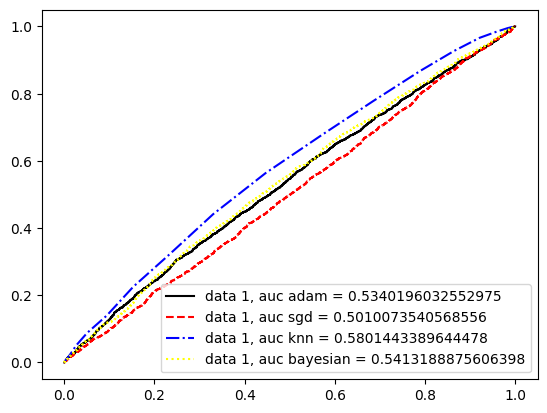

In [26]:
plt.plot(fpr_adam, tpr_adam, label="data 1, auc adam = "+str(auc_adam), linestyle = '-', color = 'black')
plt.legend(loc=4)

plt.plot(fpr_sgd, tpr_sgd, label="data 1, auc sgd = "+str(auc_sgd), linestyle = '--', color = 'red')
plt.legend(loc=4)

plt.plot(fpr_knn, tpr_knn, label="data 1, auc knn = "+str(auc_knn), linestyle = '-.', color = 'blue')
plt.legend(loc=4)

plt.plot(fpr_bay, tpr_bay, label="data 1, auc bayesian = "+str(auc_bay), linestyle = ':', color = 'yellow')
plt.legend(loc=4)

plt.show()

Optimal Threshold: inf
Maximum Accuracy: 0.642796005706134


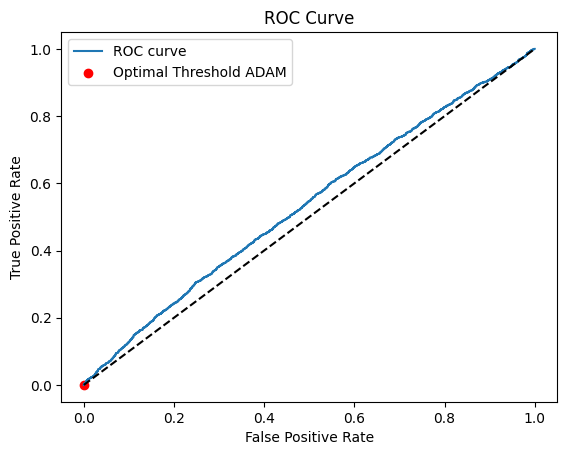

In [27]:
# Compute accuracy for each threshold
accuracies_adam = list()
for threshold in thresholds_adam:
    y_pred = (y_pred_proba_adam >= threshold).astype(int)
    accuracies_adam.append(accuracy_score(y, y_pred))

# Find the threshold with the maximum accuracy
max_acc_adam_idx = np.argmax(accuracies_adam)
opt_thresh_adam = thresholds_adam[max_acc_adam_idx]
max_accuracy_adam = accuracies_adam[max_acc_adam_idx]


print(f'Optimal Threshold: {opt_thresh_adam}')
print(f'Maximum Accuracy: {max_accuracy_adam}')


plt.figure()
plt.plot(fpr_adam, tpr_adam, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_adam[max_acc_adam_idx], tpr_adam[max_acc_adam_idx], color='red', label='Optimal Threshold ADAM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Optimal Threshold: inf
Maximum Accuracy: 0.642796005706134


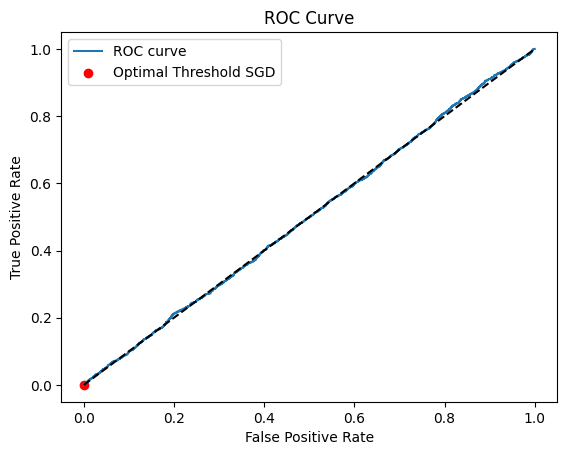

In [28]:
# Compute accuracy for each threshold
accuracies_sgd = list()
for threshold in thresholds_sgd:
    y_pred = (y_pred_proba_adam >= threshold).astype(int)
    accuracies_sgd.append(accuracy_score(y, y_pred))

# Find the threshold with the maximum accuracy
max_acc_sgd_idx = np.argmax(accuracies_sgd)
opt_thresh_sgd = thresholds_sgd[max_acc_sgd_idx]
max_accuracy_sgd = accuracies_sgd[max_acc_sgd_idx]


print(f'Optimal Threshold: {opt_thresh_sgd}')
print(f'Maximum Accuracy: {max_accuracy_sgd}')


plt.figure()
plt.plot(fpr_sgd, tpr_sgd, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr_sgd[max_acc_sgd_idx], tpr_sgd[max_acc_sgd_idx], color='red', label='Optimal Threshold SGD')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Tratando os dados de teste : 

In [29]:
test = pd.read_csv("test.csv")
test.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere


In [30]:
PatientID = test['Patient ID']

In [31]:
test.loc[:, 'Sex'] = test.loc[:, 'Sex'].replace({'Male' : 1, 'Female' : 0})
test.loc[:, 'Hemisphere'] = test.loc[:, 'Hemisphere'].replace({'Southern Hemisphere' : 1, 'Northern Hemisphere' : 0})

In [32]:
col = ['Patient ID', 'Blood Pressure', 'Country', 'Continent']

test = test.loc[:, ~test.columns.isin(col)]
test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere
0,67,1,208,72,0,0,1,0,0,4.168189,...,0,0,9,6.615001,261404,31.251233,286,0,6,1
1,84,1,220,107,0,0,1,1,1,3.427929,...,0,1,4,10.543780,122093,22.221862,370,6,7,0
2,60,1,145,71,1,0,1,0,1,1.892559,...,1,0,8,5.994228,234966,29.162319,247,7,7,0
3,45,1,294,66,0,0,1,1,1,13.693785,...,0,0,9,7.007392,216565,25.120605,360,4,6,0
4,36,1,133,97,1,0,1,1,1,3.618009,...,1,0,10,10.963544,223132,22.386804,605,5,10,0


In [33]:
# Fazendo o OneHotEncoder da classe Embarked.

encoded_df = pd.get_dummies(test[['Diet']], columns=['Diet']).astype(int)

test.drop(columns = ['Diet'], inplace = True)
test = pd.concat([test, encoded_df], axis = 1)
test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,1,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,1,1,0,0
1,84,1,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,0,1,0,0
2,60,1,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,0,0,1,0
3,45,1,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,0,0,1,0
4,36,1,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,0,0,1,0


In [34]:
test = test.astype(float)

#### Usando MinMax scaler para modificar os dados : 

In [35]:
#scaler = MinMaxScaler()

#test_norm = scaler.fit_transform(test)
#test_norm = pd.DataFrame(test_norm, columns=test.columns)
#test_norm.head()

In [36]:
# Escalonando os dados com o StandardScaler : 

scaler = StandardScaler()
test_norm = scaler.fit_transform(test)
test_norm = pd.DataFrame(test_norm, columns=test.columns)
test_norm.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,0.593511,0.660973,-0.636543,-0.129552,-1.363711,-0.994879,0.335126,-1.015523,-1.242685,-1.025591,...,0.180791,1.279816,0.366123,-0.609493,-1.521135,-0.514609,1.353509,1.438768,-0.729618,-0.696845
1,1.400558,0.660973,-0.489260,1.559501,-1.363711,-0.994879,0.335126,0.984715,0.804709,-1.152405,...,1.321677,-0.450011,-1.065738,-0.230971,1.099982,-0.009225,-0.738820,1.438768,-0.729618,-0.696845
2,0.261198,0.660973,-1.409775,-0.177811,0.733293,-0.994879,0.335126,-1.015523,0.804709,-1.415430,...,0.000524,0.951535,0.034867,-0.785235,1.536835,-0.009225,-0.738820,-0.695039,1.370580,-0.696845
3,-0.450902,0.660973,0.418980,-0.419104,-1.363711,-0.994879,0.335126,0.984715,0.804709,0.606240,...,0.294738,0.723049,-0.606061,-0.276033,0.226276,-0.514609,-0.738820,-0.695039,1.370580,-0.696845
4,-0.878162,0.660973,-1.557057,1.076914,0.733293,-0.994879,0.335126,0.984715,0.804709,-1.119843,...,1.443573,0.804592,-1.039582,0.827989,0.663129,1.506924,-0.738820,-0.695039,1.370580,-0.696845


#### Usando os modelos para prever sobre os dados de teste : 

In [37]:
pred = mlp_adam.predict_proba(test)[:, 1]
#pred = (pred >= opt_thresh_adam).astype(int)


pred_arr = np.column_stack((PatientID, pred))

# Create the DataFrame
predictions_df = pd.DataFrame(pred_arr, columns=['PassengerId', 'Survived'])
predictions_df.to_csv('predictions.csv', index=False)

In [38]:
predictions_df

,PassengerId,Survived
0,BMW7812,0.365577
1,XXM0972,0.365577
2,RQX1211,0.365577
3,RVN4963,0.365577
4,NCU1956,0.365577
...,...,...
1748,GQZ5013,0.365577
1749,FDK8693,0.365577
1750,SVO4635,0.365577
1751,KQR8949,0.365577


In [39]:
np.unique(pred, return_counts=True)

(array([0.36557737]), array([1753]))

In [40]:
pred = pd.read_csv('predictions.csv')
pred.head()

,PassengerId,Survived
0,BMW7812,0.365577
1,XXM0972,0.365577
2,RQX1211,0.365577
3,RVN4963,0.365577
4,NCU1956,0.365577


In [41]:
pred['Survived'].value_counts()

Survived
0.365577    1753
Name: count, dtype: int64

In [42]:
pred_adam = mlp_adam.predict(test)
np.unique(pred_adam, return_counts=True)

(array([0]), array([1753]))

In [43]:
pred_sgd = mlp_sgd.predict(test)
np.unique(pred_sgd, return_counts=True)

(array([0]), array([1753]))